The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
seed 843


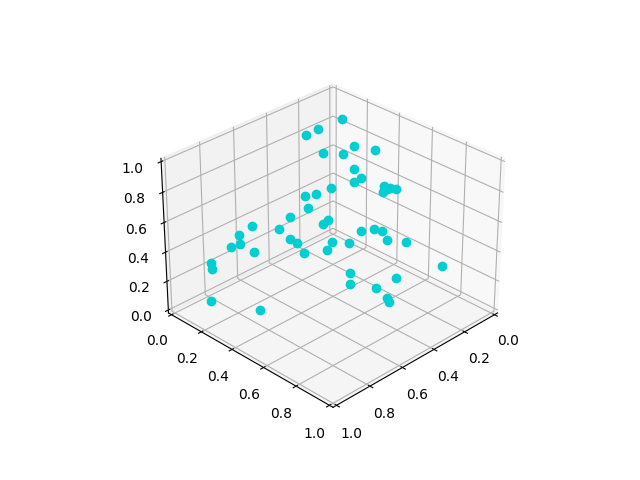

In [14]:
import numpy as np
import methods as m
%matplotlib widget
%load_ext autoreload
%autoreload 2
sd = np.random.randint(low=10, high=10000)
sd = 843
print("seed", sd)
np.random.seed(sd)
#8569

map = m.getLimitedMap3D()
pts = m.dich(50)
map.plot(pts[:,0], pts[:,1], pts[:,2], 'o', color='darkturquoise')

/var/folders/29/6lrl9x8116gbhpm7v2lsh0lh0000gn/T/ipykernel_76030/1681705141.py:60: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.draw()


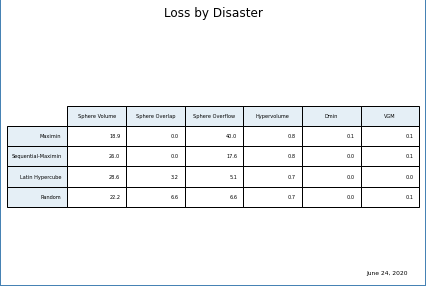

In [28]:
import numpy as np
import matplotlib.pyplot as plt
title_text = 'Loss by Disaster'
footer_text = 'June 24, 2020'
fig_background_color = 'white'
fig_border = 'steelblue'
data =  [
            [         'Sphere Volume', 'Sphere Overlap', 'Sphere Overflow', 'Hypervolume', 'Dmin', 'VGM'],
            [ 'Maximin', 18.9, 0, 40, 0.76, 0.08, 0.06],
            ['Sequential-Maximin', 26, 0, 17.6, 0.75, 0.02, 0.06],
            ['Latin Hypercube',28.6, 3.2, 5.1, 0.7, 0,0.01],
            ['Random',  22.2, 6.6, 6.6, 0.73, 0.02, 0.06],
        ]
# Pop the headers from the data array
column_headers = data.pop(0)
row_headers = [x.pop(0) for x in data]
# Table data needs to be non-numeric text. Format the data
# while I'm at it.
cell_text = []
for row in data:
    cell_text.append([f'{x:1.1f}' for x in row])
# Get some lists of color specs for row and column headers
rcolors = plt.cm.BuPu(np.full(len(row_headers), 0.1))
ccolors = plt.cm.BuPu(np.full(len(column_headers), 0.1))
# Create the figure. Setting a small pad on tight_layout
# seems to better regulate white space. Sometimes experimenting
# with an explicit figsize here can produce better outcome.
plt.figure(linewidth=2,
           edgecolor=fig_border,
           facecolor=fig_background_color,
           tight_layout={'pad':1},
           #figsize=(5,3)
          )
# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=row_headers,
                      rowColours=rcolors,
                      rowLoc='right',
                      colColours=ccolors,
                      colLabels=column_headers,
                      loc='center',
                      fontsize=120)

the_table.set_fontsize(75)
# Scaling is the only influence we have over top and bottom cell padding.
# Make the rows taller (i.e., make cell y scale larger).
the_table.scale(1, 1.5)
# Hide axes
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# Hide axes border
plt.box(on=None)
# Add title
plt.suptitle(title_text)
# Add footer
plt.figtext(0.95, 0.05, footer_text, horizontalalignment='right', size=6, weight='light')
# Force the figure to update, so backends center objects correctly within the figure.
# Without plt.draw() here, the title will center on the axes and not the figure.
plt.draw()
# Create image. plt.savefig ignores figure edge and face colors, so map them.
fig = plt.gcf()
plt.savefig('pyplot-table-demo.png',
            #bbox='tight',
            edgecolor=fig.get_edgecolor(),
            facecolor=fig.get_facecolor(),
            dpi=150
            )